## Mike Hamilton - Engine Transformation Python Demo


In [2]:
import os
import numpy as np
import pandas as pd

...we can select our files...

In [3]:
temp = 'C:/Shared Files/example_data_(002)/%s.csv'

In [4]:
tDept = temp % ('Department')
tDeptNames = temp % ('DepartmentNames')
tQuestions = temp % ('Questions')
tRespData = temp % ('ResponseData')
tResponses = temp % ('Responses')


...and make them into Dataframes which gives us a lot of powerful functionality.

In [5]:
Dept = pd.read_csv(tDept)
DeptNames = pd.read_csv(tDeptNames)
Questions = pd.read_csv(tQuestions)
RespData = pd.read_csv(tRespData)
Responses = pd.read_csv(tResponses)

we can have a quick look at the files...

In [6]:
Questions

,ContentID,QNumber,Sequence,QuestionID,QuestionTypeID,LocalText,ScaleID
0,143,1,60,1014649,1,I feel proud to work for ANON,30
1,144,2,70,1014650,1,Working here inspires me to do the best work I...,30
2,145,3,80,1014651,1,I would recommend ANON as a good place to work,30
3,146,4,90,1014652,1,I would like to be working for ANON in 12 mont...,30
4,147,5,100,1014653,1,My personal morale is good,30
5,149,6,130,1014655,1,I understand ANON's strategic direction,30
6,150,7,140,1014656,1,I feel committed to ANON?s strategic direction,30
7,151,8,150,1014657,1,I believe that ANON makes a positive differenc...,30
8,152,9,160,1014658,1,"Overall, I am satisfied working at ANON",30
9,153,10,180,1014659,1,The values of ANON are relevant to my work,30


We'll have a quick drill into some of this data then tie the whole thing together and see what it can tell us. It is interesting that ScaleID which is listed as a foreign key is only one value.

first the questions...

In [7]:
Questions.describe()

,ContentID,QNumber,Sequence,QuestionID,QuestionTypeID,ScaleID
count,20.000000,20.00000,20.000000,2.000000e+01,20.0,20.0
mean,153.500000,10.50000,180.500000,1.014660e+06,1.0,30.0
std,6.589465,5.91608,77.083345,6.589465e+00,0.0,0.0
min,143.000000,1.00000,60.000000,1.014649e+06,1.0,30.0
25%,148.500000,5.75000,122.500000,1.014654e+06,1.0,30.0
50%,153.500000,10.50000,185.000000,1.014660e+06,1.0,30.0
75%,158.500000,15.25000,237.500000,1.014664e+06,1.0,30.0
max,164.000000,20.00000,300.000000,1.014670e+06,1.0,30.0


In [12]:
RespData.QuestionID.value_counts().describe()

count     136.000000
mean      696.426471
std       414.636898
min        20.000000
25%       106.000000
50%       964.000000
75%       975.250000
max      1000.000000
Name: QuestionID, dtype: float64

However in response data we have 136 questions, the most a question is answered is 1000 times the minimum is 20, 25% of questions get 106 or less answers. This is interesting, if we equate a response to have value then there is margin here to increase value.

We'll do some more probing... How many gave 1000 responses, drill in on those low responses etc...

In [9]:
# RespData.QuestionID.value_counts() # quick look at the numbers

for i in range(0,101,10): # let's fleshout the percentiles
    print(i,'% -',int(pd.DataFrame(RespData.QuestionID.value_counts()).quantile(i/100)))

0 % - 20
10 % - 42
20 % - 105
30 % - 181
40 % - 955
50 % - 964
60 % - 967
70 % - 973
80 % - 979
90 % - 985
100 % - 1000


There is a big jump at 30% - about a third of our questions get 18% or less responses...  

We will investigate these 'unpopular' questions further down

Lets look at respondents, there are 1000 of them.

In [13]:
RespData.ResponseID.value_counts().describe()

count    1000.000000
mean       94.714000
std        15.189566
min         8.000000
25%        94.000000
50%        94.000000
75%        96.000000
max       136.000000
Name: ResponseID, dtype: float64

The minimum number of questions answered is only 8 out of 136 however 75% of our responses answered 94 questions

In [10]:
# RespData.ResponseID.value_counts() # quick look at the numbers
 
for i in range(0,101,10): # let's fleshout the percentiles
    print(i,'% -',int(pd.DataFrame(RespData.ResponseID.value_counts()).quantile(i/100)))

0 % - 8
10 % - 93
20 % - 94
30 % - 94
40 % - 94
50 % - 94
60 % - 94
70 % - 95
80 % - 98
90 % - 111
100 % - 136


In [11]:
rdg = pd.DataFrame(RespData.groupby('QuestionID').size()).sort_values(0,ascending=False)

# RespData
rdg.columns = ['Total_Responses']
rdg.head(),rdg.tail()

(            Total_Responses
 QuestionID                 
 1014647                1000
 1014653                1000
 1016385                1000
 1016386                1000
 1014651                1000,             Total_Responses
 QuestionID                 
 1014748                  42
 1014747                  42
 1014746                  42
 1014757                  42
 1014763                  20)

In [12]:
Questions.QuestionID.is_unique # QuestionID is unique so we will make it the index
# Questions.set_index('QuestionID',inplace=True)

True

In [13]:
Questions

,ContentID,QNumber,Sequence,QuestionID,QuestionTypeID,LocalText,ScaleID
0,143,1,60,1014649,1,I feel proud to work for ANON,30
1,144,2,70,1014650,1,Working here inspires me to do the best work I...,30
2,145,3,80,1014651,1,I would recommend ANON as a good place to work,30
3,146,4,90,1014652,1,I would like to be working for ANON in 12 mont...,30
4,147,5,100,1014653,1,My personal morale is good,30
5,149,6,130,1014655,1,I understand ANON's strategic direction,30
6,150,7,140,1014656,1,I feel committed to ANON?s strategic direction,30
7,151,8,150,1014657,1,I believe that ANON makes a positive differenc...,30
8,152,9,160,1014658,1,"Overall, I am satisfied working at ANON",30
9,153,10,180,1014659,1,The values of ANON are relevant to my work,30


In [14]:
# if Dept.index.empty: Dept.set_index('DataDepartmentID', inplace=True)

In [15]:
Dept.head()

,DataDepartmentID,ResponseID,SurveyID,DeptCode
0,51601,52247,1,C00021
1,51602,52248,1,C00060
2,51603,52249,1,C00044
3,51604,52250,1,C00030
4,51605,52251,1,C00038


In [16]:
DeptNames.DeptCode.value_counts().describe() # unique
# DeptNames.set_index('DeptCode',inplace=True)

count    128.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: DeptCode, dtype: float64

In [17]:
DeptNames.head()

,HierarchyDetailID,DeptCode,DeptParent,DeptTitle,Headcount,Level
0,130.0,C00000,NaN,ANON Overall,3277.0,0.0
1,131.0,C00001,C00000,Dept C00001,1032.0,1.0
2,132.0,C00002,C00001,Dept C00002,13.0,2.0
3,133.0,C00003,C00001,Dept C00003,21.0,2.0
4,134.0,C00004,C00001,Dept C00004,232.0,2.0


In [18]:
Responses

,ScaleResponseID,ScaleID,Response,Label,ScaleResponseTypeID,Score
0,146,30,1,Strongly agree,1,0
1,147,30,2,Agree,1,0
2,148,30,3,Neither agree nor disagree,2,0
3,149,30,4,Disagree,3,0
4,150,30,5,Strongly disagree,3,0


In [19]:
RespData.head()

,DataInvertID,ResponseID,QuestionID,Response
0,6135910,52255,1014710,2
1,6135911,52255,1014711,3
2,6135912,52255,1014719,2
3,6135916,52255,1014739,2
4,6135920,52255,1014771,1


In [20]:
Responses

,ScaleResponseID,ScaleID,Response,Label,ScaleResponseTypeID,Score
0,146,30,1,Strongly agree,1,0
1,147,30,2,Agree,1,0
2,148,30,3,Neither agree nor disagree,2,0
3,149,30,4,Disagree,3,0
4,150,30,5,Strongly disagree,3,0


In [21]:
Questions.head()

,ContentID,QNumber,Sequence,QuestionID,QuestionTypeID,LocalText,ScaleID
0,143,1,60,1014649,1,I feel proud to work for ANON,30
1,144,2,70,1014650,1,Working here inspires me to do the best work I...,30
2,145,3,80,1014651,1,I would recommend ANON as a good place to work,30
3,146,4,90,1014652,1,I would like to be working for ANON in 12 mont...,30
4,147,5,100,1014653,1,My personal morale is good,30


In [22]:
RDR = RespData.set_index('Response').join(Responses)
RDR.head()

,DataInvertID,ResponseID,QuestionID,ScaleResponseID,ScaleID,Response,Label,ScaleResponseTypeID,Score
0,6136565,52298,1014722,146.0,30.0,1.0,Strongly agree,1.0,0.0
0,6136567,52298,1014736,146.0,30.0,1.0,Strongly agree,1.0,0.0
0,6136569,52298,1014752,146.0,30.0,1.0,Strongly agree,1.0,0.0
0,6136570,52298,1014744,146.0,30.0,1.0,Strongly agree,1.0,0.0
0,6137100,52299,1014736,146.0,30.0,1.0,Strongly agree,1.0,0.0


In [23]:
bigqr = Questions.set_index('QuestionID').drop(columns='ScaleID').join(RDR.set_index('QuestionID'))
bigqr

,ContentID,QNumber,Sequence,QuestionTypeID,LocalText,DataInvertID,ResponseID,ScaleResponseID,ScaleID,Response,Label,ScaleResponseTypeID,Score
QuestionID,,,,,,,,,,,,,
1014649,143,1,60,1,I feel proud to work for ANON,6136271,52252,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6137134,52251,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6140021,52336,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6140113,52304,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6141484,52274,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6146949,52300,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6147690,52281,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6149776,52284,147.0,30.0,2.0,Agree,1.0,0.0
1014649,143,1,60,1,I feel proud to work for ANON,6149894,52350,147.0,30.0,2.0,Agree,1.0,0.0


In [24]:
bigqr.describe() 
# For our purposes we can drop QuestionTypeID, ScaleID and Score as they only contain one val (we compare max and min)

,ContentID,QNumber,Sequence,QuestionTypeID,DataInvertID,ResponseID,ScaleResponseID,ScaleID,Response,ScaleResponseTypeID,Score
count,19780.000000,19780.000000,19780.000000,19780.0,1.978000e+04,19780.000000,19058.000000,19058.0,19058.000000,19058.000000,19058.0
mean,153.467897,10.471335,180.120829,1.0,6.260393e+06,52749.028463,148.220065,30.0,3.220065,2.117903,0.0
std,6.429268,5.771965,75.211756,0.0,6.694027e+04,289.264189,0.867790,0.0,0.867790,0.693604,0.0
min,143.000000,1.000000,60.000000,1.0,6.135921e+06,52247.000000,147.000000,30.0,2.000000,1.000000,0.0
25%,147.000000,5.000000,100.000000,1.0,6.207762e+06,52499.000000,148.000000,30.0,3.000000,2.000000,0.0
50%,153.000000,10.000000,180.000000,1.0,6.259143e+06,52748.000000,148.000000,30.0,3.000000,2.000000,0.0
75%,158.000000,15.000000,230.000000,1.0,6.311025e+06,52998.000000,149.000000,30.0,4.000000,3.000000,0.0
max,164.000000,20.000000,300.000000,1.0,6.441302e+06,53250.000000,150.000000,30.0,5.000000,3.000000,0.0


In [25]:
bigqr.drop(columns=['QuestionTypeID', 'ScaleID', 'Score'],inplace=True)

In [26]:
bigqr.groupby(['LocalText','QNumber']).max().sort_index(level=1) #we'll just check QNumber Maps exactly to LocalText

,,ContentID,DataInvertID,Response,ResponseID,ScaleResponseID,ScaleResponseTypeID,Sequence
LocalText,QNumber,,,,,,,
I feel proud to work for ANON,1,143,6440676,5.0,53250,150.0,3.0,60
Working here inspires me to do the best work I can,2,144,6439159,5.0,53250,150.0,3.0,70
I would recommend ANON as a good place to work,3,145,6440317,5.0,53250,150.0,3.0,80
I would like to be working for ANON in 12 months? time,4,146,6440979,5.0,53250,150.0,3.0,90
My personal morale is good,5,147,6441298,5.0,53250,150.0,3.0,100
I understand ANON's strategic direction,6,149,6441299,5.0,53250,150.0,3.0,130
I feel committed to ANON?s strategic direction,7,150,6440677,5.0,53250,150.0,3.0,140
I believe that ANON makes a positive difference to people's lives,8,151,6439160,5.0,53250,150.0,3.0,150
"Overall, I am satisfied working at ANON",9,152,6440318,5.0,53250,150.0,3.0,160


In [27]:
Dept.loc[Dept['DeptCode'] == 'C00012'].head()

,DataDepartmentID,ResponseID,SurveyID,DeptCode
47,51648,52295,1,C00012
59,51660,52307,1,C00012
64,51665,52312,1,C00012
69,51670,52317,1,C00012
103,51704,52351,1,C00012


In [28]:
DeptNames = DeptNames.dropna()
DeptNames

,HierarchyDetailID,DeptCode,DeptParent,DeptTitle,Headcount,Level
1,131.0,C00001,C00000,Dept C00001,1032.0,1.0
2,132.0,C00002,C00001,Dept C00002,13.0,2.0
3,133.0,C00003,C00001,Dept C00003,21.0,2.0
4,134.0,C00004,C00001,Dept C00004,232.0,2.0
5,135.0,C00005,C00004,Dept C00005,73.0,3.0
6,136.0,C00006,C00004,Dept C00006,81.0,3.0
7,137.0,C00007,C00004,Dept C00007,74.0,3.0
8,138.0,C00008,C00001,Dept C00008,102.0,2.0
9,139.0,C00009,C00008,Dept C00009,45.0,3.0
10,140.0,C00010,C00008,Dept C00010,57.0,3.0


In [29]:
DeptDN = Dept.set_index('DeptCode').join(DeptNames.set_index('DeptCode'))
DeptDN.head()

,DataDepartmentID,ResponseID,SurveyID,HierarchyDetailID,DeptParent,DeptTitle,Headcount,Level
DeptCode,,,,,,,,
C00001,51761,52409,1,131.0,C00000,Dept C00001,1032.0,1.0
C00001,52325,52974,1,131.0,C00000,Dept C00001,1032.0,1.0
C00001,52540,53190,1,131.0,C00000,Dept C00001,1032.0,1.0
C00002,52010,52658,1,132.0,C00001,Dept C00002,13.0,2.0
C00002,52043,52691,1,132.0,C00001,Dept C00002,13.0,2.0


In [30]:
Deptbqr = bigqr.set_index('ResponseID').join(DeptDN.set_index('ResponseID'))
Deptbqr.head()

,ContentID,QNumber,Sequence,LocalText,DataInvertID,ScaleResponseID,Response,Label,ScaleResponseTypeID,DataDepartmentID,SurveyID,HierarchyDetailID,DeptParent,DeptTitle,Headcount,Level
ResponseID,,,,,,,,,,,,,,,,
52247,143,1,60,I feel proud to work for ANON,6136250,148.0,3.0,Neither agree nor disagree,2.0,51601,1,151.0,C00020,Dept C00021,57.0,3.0
52247,144,2,70,Working here inspires me to do the best work I...,6159267,149.0,4.0,Disagree,3.0,51601,1,151.0,C00020,Dept C00021,57.0,3.0
52247,145,3,80,I would recommend ANON as a good place to work,6158121,149.0,4.0,Disagree,3.0,51601,1,151.0,C00020,Dept C00021,57.0,3.0
52247,146,4,90,I would like to be working for ANON in 12 mont...,6157125,149.0,4.0,Disagree,3.0,51601,1,151.0,C00020,Dept C00021,57.0,3.0
52247,147,5,100,My personal morale is good,6154882,149.0,4.0,Disagree,3.0,51601,1,151.0,C00020,Dept C00021,57.0,3.0


In [31]:
Deptbqr.shape #16 rows 19780 columns

(19780, 16)

In [32]:
Deptbqr.nunique(axis=0) # DataInvertID is a unique field 

ContentID                 20
QNumber                   20
Sequence                  20
LocalText                 20
DataInvertID           19780
ScaleResponseID            4
Response                   4
Label                      4
ScaleResponseTypeID        3
DataDepartmentID        1000
SurveyID                   1
HierarchyDetailID        115
DeptParent                30
DeptTitle                115
Headcount                 70
Level                      4
dtype: int64

Create aggregated counts for each question and question response.

In [33]:
## make a table of volumes then percentages of index = LocalText.rename and cols = Label.rename order the columns too
# who is the most responsive department
# how many levels dose the dept heiracy have? do the total num peeps in a higher dept = sum of child depts?
# do a

In [34]:
agg1 = pd.crosstab(Deptbqr.LocalText,Deptbqr.Label \
                   ,normalize='index').sort_values('Strongly disagree',ascending=False)# cross tab our aggregates
agg1.rename_axis('Question',inplace=True) # rename axis
agg1.rename_axis('',axis=1,inplace=True) #drop the column names 'Label'
agg1 = agg1.iloc[:,[0,2,1,3]] # put our columns in a better order
agg1.style.format('{:.1%}') # and format to %

,Agree,Neither agree nor disagree,Disagree,Strongly disagree
Question,,,,
I have the equipment/technology to carry out my role,8.5%,38.3%,21.5%,31.6%
My personal morale is good,14.9%,48.2%,21.0%,16.0%
I am able to make improvements happen in my area of work,12.4%,44.5%,28.0%,15.2%
I believe internal policy and procedures are consistent with the values of ANON,10.1%,43.8%,32.0%,14.1%
I believe the values and behaviours of senior leaders in my part of the organisation (Director and ?Heads of?) are consistent with the values of ANON,18.8%,45.0%,23.1%,13.1%
I would recommend ANON as a good place to work,14.7%,48.7%,23.8%,12.9%
I understand ANON's strategic direction,9.8%,54.5%,23.5%,12.2%
"Overall, I am satisfied working at ANON",15.1%,54.2%,19.3%,11.4%
I believe the values and behaviours of leaders (anyone who leads a team - Managers and Team Leaders) are consistent with the values of ANON,18.7%,51.1%,19.6%,10.6%


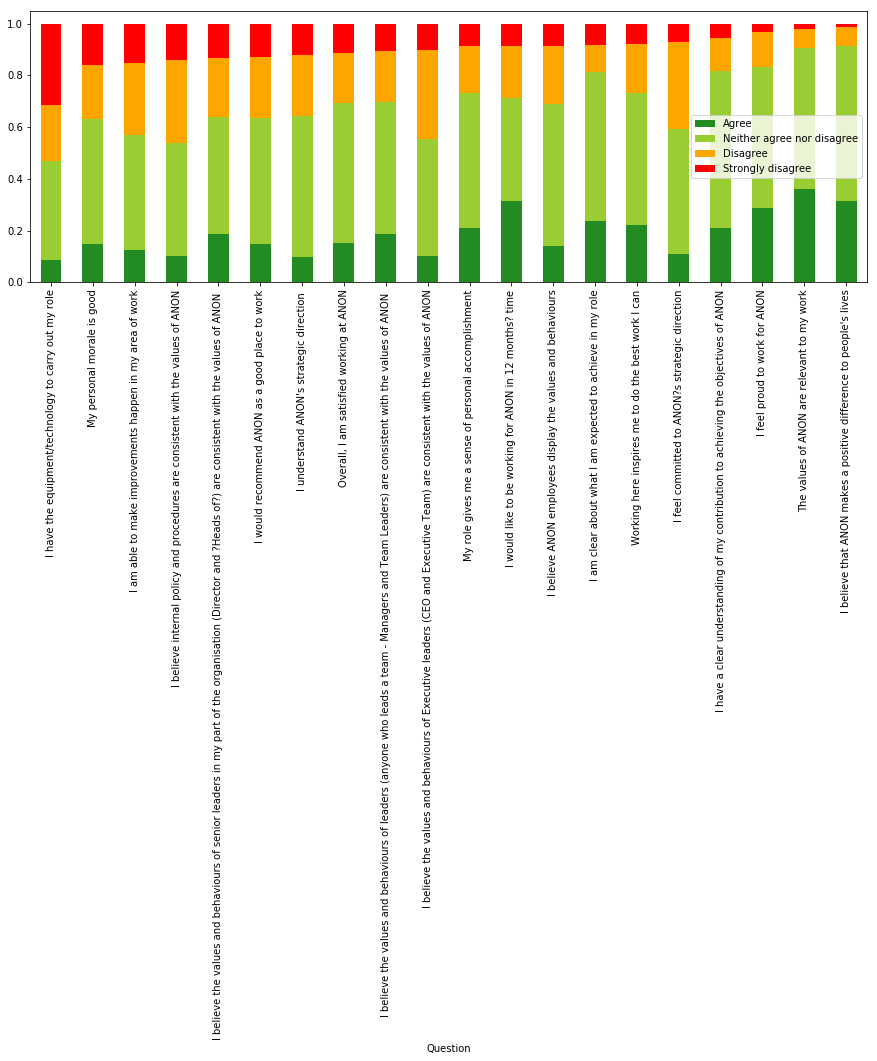

In [35]:
agg1.plot.bar(stacked=True,figsize=(15,5),color=['forestgreen','yellowgreen','orange','r'])

Create aggregated counts for each question and question response for all deparment code in the hierarchical structure

In [36]:
DeptNames.head()

,HierarchyDetailID,DeptCode,DeptParent,DeptTitle,Headcount,Level
1,131.0,C00001,C00000,Dept C00001,1032.0,1.0
2,132.0,C00002,C00001,Dept C00002,13.0,2.0
3,133.0,C00003,C00001,Dept C00003,21.0,2.0
4,134.0,C00004,C00001,Dept C00004,232.0,2.0
5,135.0,C00005,C00004,Dept C00005,73.0,3.0


In [37]:
## we'll extract a list of tuples of parents and children
dp_dc = DeptNames.loc[:,['DeptParent','DeptCode']]
dp_dc = dp_dc.values.tolist()

## we want to add the departments with no child in the parent section with None child value
cmyw = set(y for x,y in [*dp_dc])
pmyw = set(x for x,y in [*dp_dc]) ##unique set of parents

for x in cmyw: ## if the child is not in the parent field append it
    if x not in pmyw:
        dp_dc.append([x,None])

dp_dc

[['C00000', 'C00001'],
 ['C00001', 'C00002'],
 ['C00001', 'C00003'],
 ['C00001', 'C00004'],
 ['C00004', 'C00005'],
 ['C00004', 'C00006'],
 ['C00004', 'C00007'],
 ['C00001', 'C00008'],
 ['C00008', 'C00009'],
 ['C00008', 'C00010'],
 ['C00001', 'C00011'],
 ['C00011', 'C00012'],
 ['C00011', 'C00013'],
 ['C00011', 'C00014'],
 ['C00011', 'C00015'],
 ['C00001', 'C00016'],
 ['C00016', 'C00017'],
 ['C00016', 'C00018'],
 ['C00016', 'C00019'],
 ['C00001', 'C00020'],
 ['C00020', 'C00021'],
 ['C00020', 'C00022'],
 ['C00020', 'C00023'],
 ['C00020', 'C00024'],
 ['C00000', 'C00025'],
 ['C00025', 'C00026'],
 ['C00026', 'C00027'],
 ['C00026', 'C00028'],
 ['C00026', 'C00029'],
 ['C00026', 'C00030'],
 ['C00025', 'C00031'],
 ['C00031', 'C00032'],
 ['C00031', 'C00033'],
 ['C00031', 'C00034'],
 ['C00031', 'C00035'],
 ['C00025', 'C00036'],
 ['C00036', 'C00037'],
 ['C00036', 'C00038'],
 ['C00025', 'C00039'],
 ['C00039', 'C00040'],
 ['C00040', 'C00041'],
 ['C00040', 'C00042'],
 ['C00040', 'C00043'],
 ['C00040',

In [38]:
d = dict() ## we'll make a dictionary with a key for each parent and the first level of children listed as the value
for [parent, child] in dp_dc:
    if parent in d:
        d[parent].append(child)
    else:
        d[parent] = [child]
        
d

{'C00000': ['C00001', 'C00025', 'C00055', 'C00082', 'C00102'],
 'C00001': ['C00002',
  'C00003',
  'C00004',
  'C00008',
  'C00011',
  'C00016',
  'C00020'],
 'C00004': ['C00005', 'C00006', 'C00007'],
 'C00008': ['C00009', 'C00010'],
 'C00011': ['C00012', 'C00013', 'C00014', 'C00015'],
 'C00016': ['C00017', 'C00018', 'C00019'],
 'C00020': ['C00021', 'C00022', 'C00023', 'C00024'],
 'C00025': ['C00026', 'C00031', 'C00036', 'C00039', 'C00049'],
 'C00026': ['C00027', 'C00028', 'C00029', 'C00030'],
 'C00031': ['C00032', 'C00033', 'C00034', 'C00035'],
 'C00036': ['C00037', 'C00038'],
 'C00039': ['C00040', 'C00045', 'C00048'],
 'C00040': ['C00041', 'C00042', 'C00043', 'C00044'],
 'C00045': ['C00046', 'C00047'],
 'C00049': ['C00050', 'C00051', 'C00052', 'C00053', 'C00054'],
 'C00055': ['C00056', 'C00057', 'C00058', 'C00063', 'C00069', 'C00078'],
 'C00058': ['C00059', 'C00060', 'C00061', 'C00062'],
 'C00063': ['C00064', 'C00065', 'C00066', 'C00067', 'C00068'],
 'C00069': ['C00070',
  'C00071',


In [39]:
dpc={}

prnt=[p for p in d] ## a sliceable list 
## the trick is to recursively run through the heirachy
x=0
while x < len(prnt):
    for pr in prnt[x:]:
        dpc[pr] = d[pr]
        for c in d[pr]:
            if c in d:
                dpc[pr].extend([x for x in d[c] if x != None]) ## here we lose our 'none values' from the sublist of children

    x += 1
    
# for k in dpc:
#     dpc[k] = [k,*d[k]]
dpc


{'C00000': ['C00001',
  'C00025',
  'C00055',
  'C00082',
  'C00102',
  'C00002',
  'C00003',
  'C00004',
  'C00008',
  'C00011',
  'C00016',
  'C00020',
  'C00026',
  'C00031',
  'C00036',
  'C00039',
  'C00049',
  'C00056',
  'C00057',
  'C00058',
  'C00063',
  'C00069',
  'C00078',
  'C00083',
  'C00084',
  'C00085',
  'C00086',
  'C00089',
  'C00095',
  'C00099',
  'C00103',
  'C00104',
  'C00111',
  'C00118',
  'C00122',
  'C00005',
  'C00006',
  'C00007',
  'C00009',
  'C00010',
  'C00012',
  'C00013',
  'C00014',
  'C00015',
  'C00017',
  'C00018',
  'C00019',
  'C00021',
  'C00022',
  'C00023',
  'C00024',
  'C00027',
  'C00028',
  'C00029',
  'C00030',
  'C00032',
  'C00033',
  'C00034',
  'C00035',
  'C00037',
  'C00038',
  'C00040',
  'C00045',
  'C00048',
  'C00050',
  'C00051',
  'C00052',
  'C00053',
  'C00054',
  'C00059',
  'C00060',
  'C00061',
  'C00062',
  'C00064',
  'C00065',
  'C00066',
  'C00067',
  'C00068',
  'C00070',
  'C00071',
  'C00072',
  'C00073',
  'C00

In [40]:
for k,v in dpc.items():
    print(k,'|',len(v))

C00000 | 127
C00001 | 39
C00004 | 3
C00008 | 2
C00011 | 4
C00016 | 3
C00020 | 4
C00025 | 533
C00026 | 4
C00031 | 4
C00036 | 2
C00039 | 75
C00040 | 4
C00045 | 2
C00049 | 5
C00055 | 326
C00058 | 4
C00063 | 5
C00069 | 8
C00078 | 3
C00082 | 259
C00086 | 2
C00089 | 5
C00095 | 3
C00099 | 2
C00102 | 525
C00104 | 6
C00111 | 6
C00118 | 3
C00122 | 5
C00098 | 1
C00048 | 1
C00017 | 1
C00053 | 1
C00007 | 1
C00106 | 1
C00076 | 1
C00125 | 1
C00002 | 1
C00060 | 1
C00119 | 1
C00081 | 1
C00071 | 1
C00073 | 1
C00074 | 1
C00126 | 1
C00057 | 1
C00112 | 1
C00097 | 1
C00010 | 1
C00064 | 1
C00035 | 1
C00124 | 1
C00062 | 1
C00012 | 1
C00103 | 1
C00114 | 1
C00080 | 1
C00110 | 1
C00068 | 1
C00034 | 1
C00107 | 1
C00037 | 1
C00014 | 1
C00050 | 1
C00113 | 1
C00047 | 1
C00051 | 1
C00065 | 1
C00100 | 1
C00096 | 1
C00072 | 1
C00093 | 1
C00033 | 1
C00094 | 1
C00090 | 1
C00077 | 1
C00061 | 1
C00120 | 1
C00005 | 1
C00013 | 1
C00085 | 1
C00091 | 1
C00066 | 1
C00021 | 1
C00127 | 1
C00032 | 1
C00121 | 1
C00088 | 1
C00059 | 

In [41]:
# HD = DeptNames.sort_values(['DeptParent','DeptCode']).set_index(['DeptParent','DeptCode'])
# HD

In [42]:
# os.chdir('C:/Users/devenv/Desktop')
# os.getcwd()
# HD.to_excel('pandas1.xlsx')